In [10]:
import numpy as np
import xarray as xr
import salishsea_tools.river_202108 as rivers
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from salishsea_tools import viz_tools
import cmocean.cm as cm
import matplotlib as mpl

In [11]:
bathy = xr.open_dataset('/ocean/cdonaldson/MEOPAR/grid/bathymetry_202108.nc')
bathy2 = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [12]:
year = 2020
fw_day = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231.nc'.format(year, year))
fw_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231.nc'.format(year, year))
phys_day = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_{}0101_{}1231.nc'.format(year, year))
# vol_day = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d.nc'.format(year, year))
vol_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(year, year))

runoff = xr.open_dataset('../../../../../../results/forcing/rivers/R201702DFraCElse_y2020m04d30.nc')

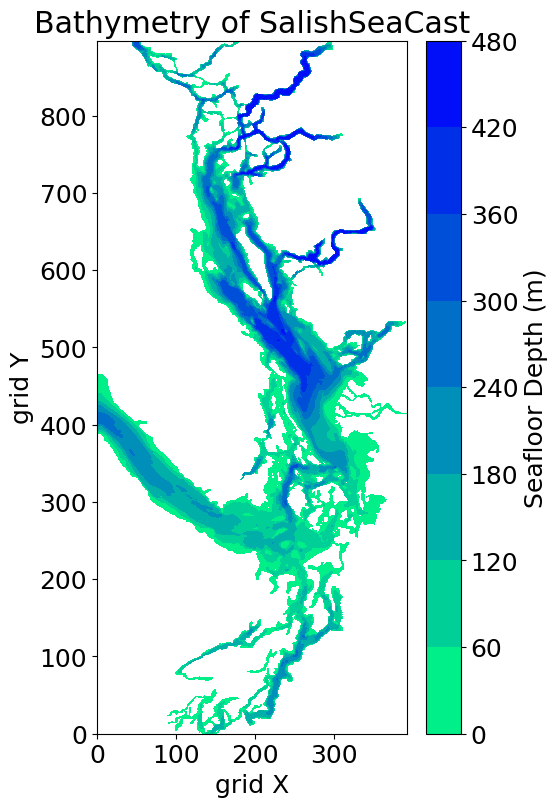

In [13]:
plt.rcParams.update({'font.size': 18})

# exclude Fraser off the edge
jmax = 394
jj = range(jmax)
ii = range(898)
jjm, iim = np.meshgrid(jj, ii)
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.contourf(bathy.Bathymetry[:, :jmax], cmap='winter_r')
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
ax.set_title('Bathymetry of SalishSeaCast')

cb = fig.colorbar(colours, ax=ax)
cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect;

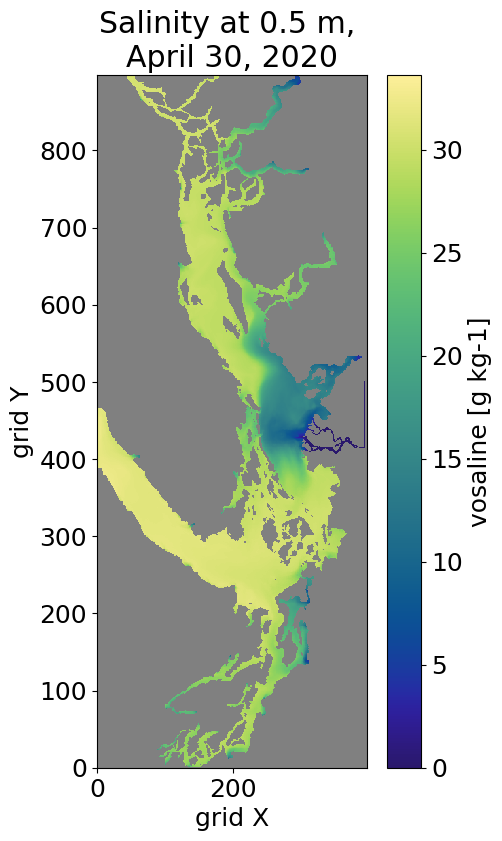

In [14]:
p_var = 'vosaline'
cmap = cm.haline
cmap.set_bad('gray')
idepth=0
fig, ax = plt.subplots(1,1, figsize = (5,9))

time_idx = 120
max = phys_day[p_var][idepth].max()

salinity = np.ma.masked_array(phys_day[p_var][time_idx][idepth], mask=tmask[0])
colours = ax.pcolormesh(salinity, vmin=0, vmax=max, cmap=cmap)
dtime = pd.to_datetime(phys_day['time'].values[time_idx])
ax.set_title('Salinity at {:.1f} m, \n{} {}, {}'.format(phys_day['depth'][idepth].values, dtime.month_name(), dtime.day, dtime.year))
cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, phys_day[p_var].units))
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')

viz_tools.set_aspect(ax);

(170.0, 220.0)

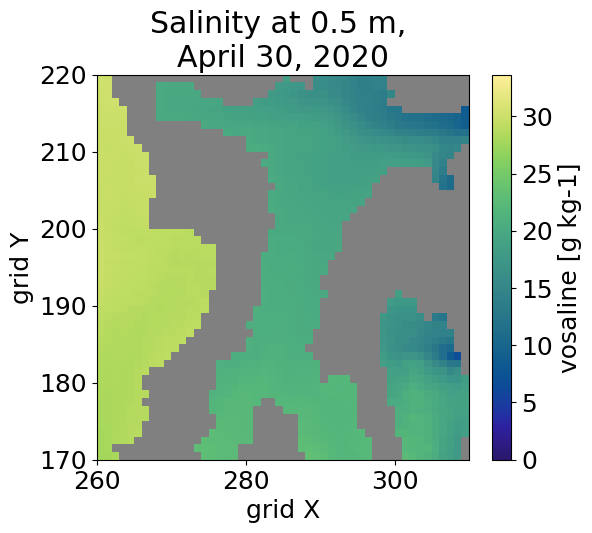

In [15]:
p_var = 'vosaline'
cmap = cm.haline
cmap.set_bad('gray')
idepth=0
fig, ax = plt.subplots(1,1, figsize = (6,5))

time_idx = 120

salinity = np.ma.masked_array(phys_day[p_var][time_idx][idepth], mask=tmask[0])
colours = ax.pcolormesh(salinity, vmin=0, vmax=max, cmap=cmap)
dtime = pd.to_datetime(phys_day['time'].values[time_idx])
ax.set_title('Salinity at {:.1f} m, \n{} {}, {}'.format(phys_day['depth'][idepth].values, dtime.month_name(), dtime.day, dtime.year))
cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, phys_day[p_var].units))
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')

ax.set_xlim([260,310])
ax.set_ylim([170,220])

# viz_tools.set_aspect(ax);

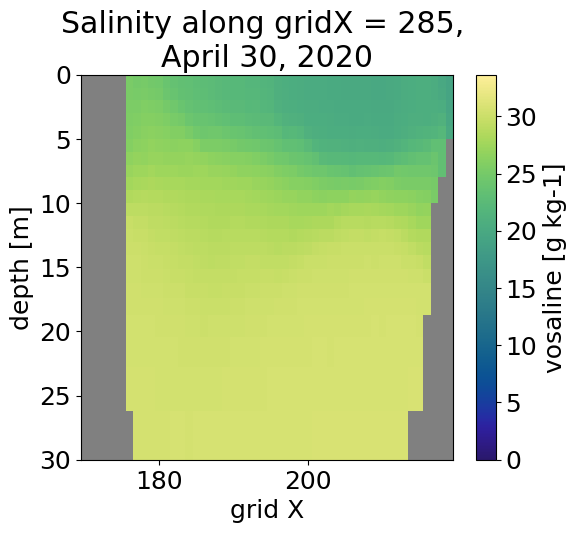

In [16]:
jdepth = 20
cmap = cm.haline
cmap.set_bad('gray')
point = 285


freshwater = np.ma.masked_array(phys_day['vosaline'][0, :, :, point], mask=tmask[:, :, point])

X = phys_day.gridY[170:220]
Y = phys_day.depth
Z = freshwater[:, 170:220]

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
colours = ax.pcolormesh(X, Y, Z, vmin=0, vmax=max, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, phys_day[p_var].units))

ax.set_title('Salinity along gridX = {}, \n{} {}, {}'.format(point, dtime.month_name(), dtime.day, dtime.year))
ax.set_ylim(0, 30)

ax.set_xlabel('grid X')
ax.set_ylabel('depth [m]')

plt.gca().invert_yaxis()

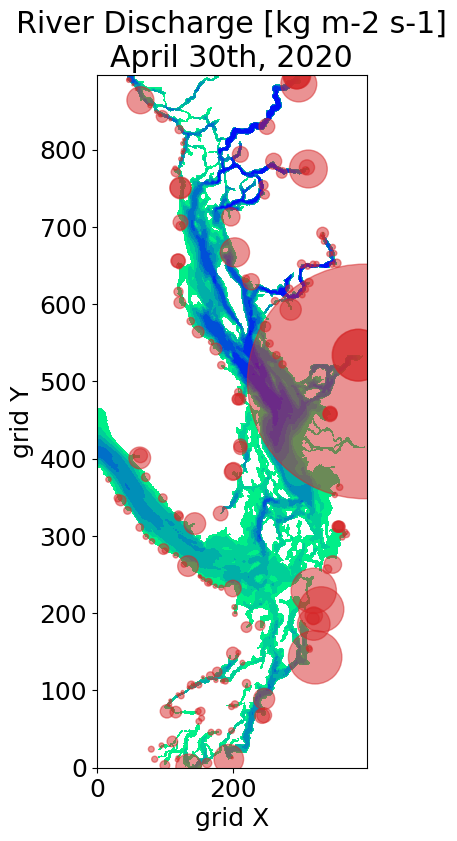

In [17]:
# exclude Fraser off the edge
jmax = 398
jj = range(jmax)
ii = range(898)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(runoff.rorunoff[0, :, :jmax])
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.contourf(bathy.Bathymetry[:, :jmax], cmap='winter_r')
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')

ax.scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='tab:red',alpha=0.5)
ax.set_title('River Discharge [kg m-2 s-1]\nApril 30th, 2020')


# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax);

In [18]:
river_dict = {'Nooksack': 'Nooksack [kg/m2/s]', 'Skagit': 'Skagit1 [kg/m2/s]', 'Snohomish': 'SnohomishAllenQuilceda [kg/m2/s]', 'Nisqually': 'NisquallyMcAllister [kg/m2/s]', 'Elwha': 'Elwha [kg/m2/s]', 'Cowichan': 'Cowichan1 [kg/m2/s]', \
              'Nanaimo': 'Nanaimo1 [kg/m2/s]', 'Puntledge': 'Puntledge [kg/m2/s]', 'Salmon': 'SalmonSayward [kg/m2/s]', 'Homathko': 'Homathko [kg/m2/s]', 'Squamish': 'Squamish [kg/m2/s]', 'Fraser': 'Fraser [kg/m2/s]' }

river_flows_202108 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_ts_subset_202108_20130101_20201231.csv')
river_flows_202108 = river_flows_202108.loc[:, river_flows_202108.columns != 'Unnamed: 0']

river_flows_202108['date'] = pd.to_datetime(river_flows_202108['date'])
river_flows_202108['month'] = river_flows_202108['date'].dt.month
river_flows_202108['dayofyear'] = river_flows_202108['date'].dt.dayofyear
daily_clim_202108 = river_flows_202108.groupby(['dayofyear']).mean(numeric_only=True).reset_index()

In [19]:
river_flows_201702 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_ts_subset_201702_20130101_20201231.csv')
river_flows_201702 = river_flows_201702.loc[:, river_flows_201702.columns != 'Unnamed: 0']

river_flows_201702['date'] = pd.to_datetime(river_flows_201702['date'])
river_flows_201702['date'] = river_flows_201702['date'] - pd.DateOffset(days=15)
river_flows_201702['month'] = river_flows_201702['date'].dt.month
river_flows_201702['dayofyear'] = river_flows_201702['date'].dt.dayofyear
daily_clim_201702 = river_flows_201702.groupby(['dayofyear']).mean(numeric_only=True).reset_index()

In [20]:
# def wrangle_df(river_dataframe, month, month_num, month_days):
#     test = river_dataframe[['YEAR','DD', month]]
#     mapping = {test.columns[0]: 'YYYY', test.columns[2]: 'DISCHARGE'}
#     test2 = test.rename(columns=mapping)
#     test2['MM'] = month_num
#     test2 = test2.drop(test2[test2['DD'] > month_days].index)
#     return test2

In [21]:
# def add_dt(df):
#     listy = [str(int(year)) for year in df['YYYY']]
#     listm = [str.zfill(str(int(month)),2) for month in df['MM']]
#     listd = [str.zfill(str(int(day)),2) for day in df['DD']]

#     lst = list([listy, listm, listd])

#     listdt = list(map('-'.join, zip(*lst)))

#     date_format = '%Y-%m-%d'
#     listdt_obj = [datetime.strptime(dt_str, date_format) for dt_str in listdt]

#     return listdt_obj

In [22]:
# def transform_df(df):
#     January = wrangle_df(df, 'Jan', 1, 31)
#     February = wrangle_df(df, 'Feb', 2, 28)
#     March = wrangle_df(df, 'Mar', 3, 31)
#     April = wrangle_df(df, 'Apr', 4, 30)
#     May = wrangle_df(df, 'May', 5, 31)
#     June = wrangle_df(df, 'Jun', 6, 30)
#     July = wrangle_df(df, 'Jul', 7, 31)
#     August = wrangle_df(df, 'Aug', 8, 31)
#     September = wrangle_df(df, 'Sep', 9, 30)
#     October = wrangle_df(df, 'Oct', 10, 31)
#     November = wrangle_df(df, 'Nov', 11, 30)
#     December = wrangle_df(df, 'Dec', 12, 31)

#     df_new = pd.DataFrame(np.vstack((January.to_numpy(), February.to_numpy(), March.to_numpy(), April.to_numpy(), May.to_numpy(), June.to_numpy(), July.to_numpy(), August.to_numpy(), September.to_numpy(), October.to_numpy(), November.to_numpy(), December.to_numpy())), columns= ['YYYY', 'DD', 'DISCHARGE', 'MM'])
    
#     df_new['DateTime'] = add_dt(df_new)

#     return df_new

In [23]:
# Fraser_obs = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/compare_daily_river/Fraser_Hope.csv',header=1)
# Fraser_obs = Fraser_obs[Fraser_obs['PARAM'] == 1]
# Fraser_obs = transform_df(Fraser_obs).sort_values(by='DateTime')

# obs_sel = (Fraser_obs['DateTime'] >= '2020-01-01') & (Fraser_obs['DateTime'] <= '2020-12-31')
# Fraser_obs = Fraser_obs[obs_sel]
# Fraser_obs['dayofyear'] = Fraser_obs['DateTime'].dt.dayofyear

# rho = 1026
# runoff_to_m3 = 86400 * (500*440)/rho
# m3_to_runoff = rho/(86400*500*440)

# Fraser_obs['Fraser [kg/m2/s]'] = Fraser_obs['DISCHARGE'] * m3_to_runoff

In [24]:
color1 = '#4f8cf0'
color2 = '#162845'
color3 = '#345d9e'

In [27]:
conv_fact = 440*500/1026

Text(0.5, 0, 'Day of 2020')

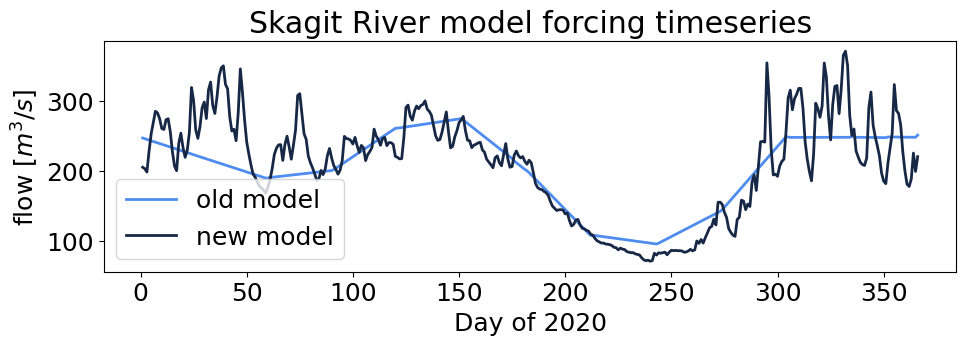

In [36]:
prod_region='Skagit'

fig, ax = plt.subplots(1, 1, figsize=(11, 3), sharex=True)

ax.plot(daily_clim_201702['dayofyear'], conv_fact*daily_clim_201702[river_dict[prod_region]], color=color1, linewidth=2, zorder=3, label='old model')
ax.plot(daily_clim_202108['dayofyear'], conv_fact*daily_clim_202108[river_dict[prod_region]], color=color2, linewidth=2, zorder=3, label='new model')
# ax.plot(Fraser_obs['dayofyear'], Fraser_obs[river_dict[prod_region]], color=color3, linestyle='--', linewidth=2, zorder=3, label='model v202111')
ax.legend()
# ax.set_ylabel('flow [kg/m2/s]')
ax.set_ylabel(r'flow [$m^3/s$]')
ax.set_title('{} River model forcing timeseries'.format(prod_region))

# diff = daily_clim_202108[river_dict[prod_region]]-daily_clim_201702[river_dict[prod_region]]
# # diff = diff[:-1]
# max_flow = diff.max()
# min_flow = diff.min()
# ax[1].plot(daily_clim_201702['dayofyear'], diff, color=color3, linewidth=2, zorder=3, label='v202111 - v201905R')
# ax[1].hlines(xmin=daily_clim_201702['dayofyear'][0], xmax=daily_clim_201702['dayofyear'].iloc[-1], y=0, color='k', linestyle='dashed', alpha=0.3)
ax.set_xlabel('Day of 2020')
# ax[1].legend()
# ax[1].set_ylabel('difference [kg/m2/s]')
# ax[1].set_title('{} River model forcing difference'.format(prod_region))

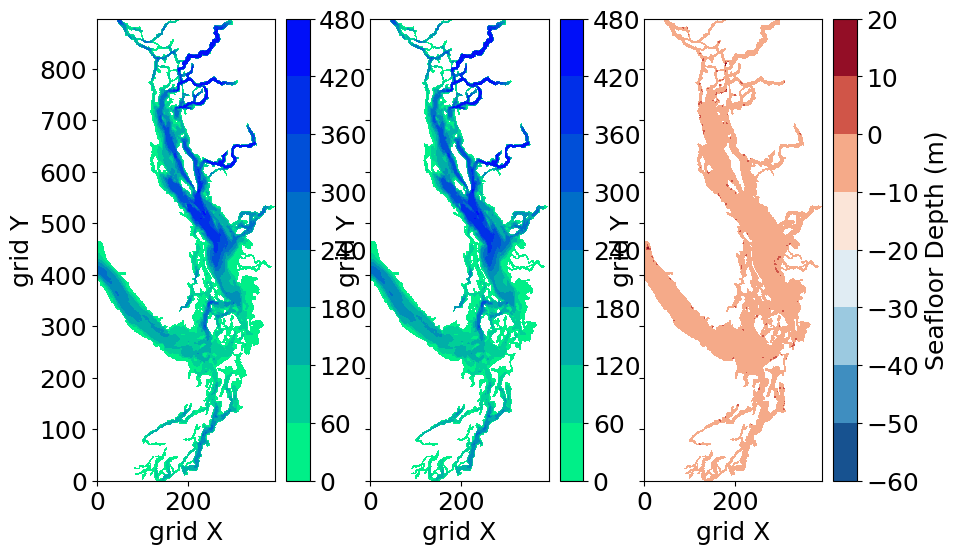

In [17]:
jmax = 394
jj = range(jmax)
ii = range(898)
jjm, iim = np.meshgrid(jj, ii)
fig, ax = plt.subplots(1, 3, figsize=(10, 6), sharex=True, sharey=True)
colours = ax[0].contourf(bathy2.Bathymetry[:, :jmax], cmap='winter_r')
ax[0].set_xlabel('grid X')
ax[0].set_ylabel('grid Y')
# ax[0].set_title('Bathymetry of SalishSeaCast')
cb = fig.colorbar(colours, ax=ax[0])
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax[0]);

colours = ax[1].contourf(bathy.Bathymetry[:, :jmax], cmap='winter_r')
ax[1].set_xlabel('grid X')
ax[1].set_ylabel('grid Y')
# ax[1].set_title('Bathymetry of SalishSeaCast')
cb = fig.colorbar(colours, ax=ax[1])
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax[1]);

colours = ax[2].contourf(bathy2.Bathymetry[:, :jmax]-bathy.Bathymetry[:, :jmax], cmap='RdBu_r')
ax[2].set_xlabel('grid X')
ax[2].set_ylabel('grid Y')
# ax[2].set_title('Bathymetry of SalishSeaCast')
cb = fig.colorbar(colours, ax=ax[2])
cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax[2]);

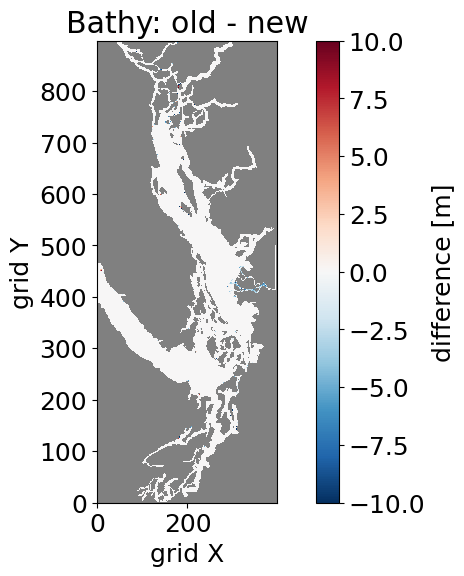

In [18]:
cut_point=10

fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True, sharey=True)
cmap = mpl.colormaps['RdBu_r']
cmap.set_bad('gray')

diff = bathy2.Bathymetry-bathy.Bathymetry
diff_filt = xr.where((diff < -10) & (~np.isnan(diff)), -10, diff)
max_abs = np.abs(diff_filt).max()
masked = np.ma.masked_array(diff_filt, mask=tmask[0])
colours = ax.pcolormesh(masked, vmin=-cut_point, vmax=cut_point, cmap=cmap)
cmap.set_bad('gray')
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')
cb = fig.colorbar(colours, ax=ax)
cb.set_label('difference [m]')
ax.set_title('Bathy: old - new')
viz_tools.set_aspect(ax);

(390.0, 430.0)

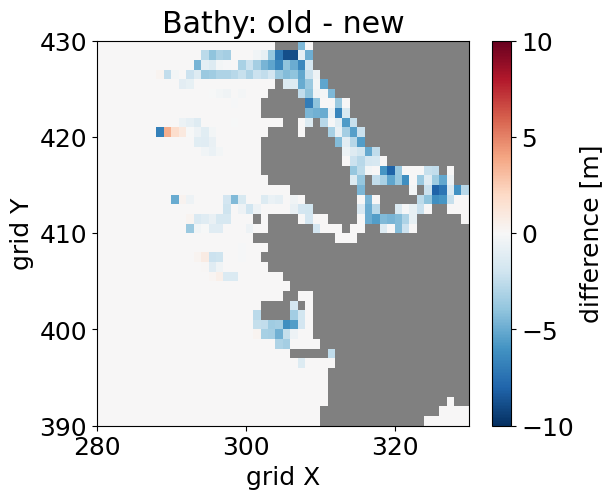

In [19]:
# cmap = mpl.colormaps['RdBu_r']
# cmap.set_bad('gray')

fig, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True, sharey=True)
diff = bathy2.Bathymetry-bathy.Bathymetry
diff_filt = xr.where((diff < -10) & (~np.isnan(diff)), -10, diff)
max_abs = np.abs(diff_filt).max()
masked = np.ma.masked_array(diff_filt, mask=tmask[0])
colours = ax.pcolormesh(masked, vmin=-cut_point, vmax=cut_point, cmap=cmap)
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')
cb = fig.colorbar(colours, ax=ax)
cb.set_label('difference [m]')
ax.set_title('Bathy: old - new')
ax.set_xlim([280,330])
ax.set_ylim([390,430])

(150.0, 200.0)

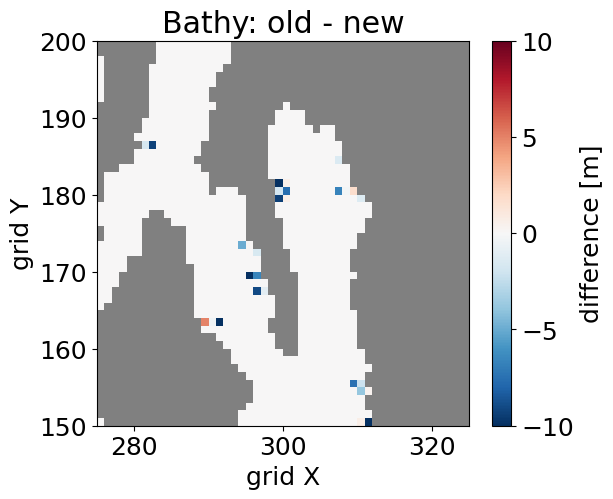

In [20]:
# cmap = mpl.colormaps['RdBu_r']
# cmap.set_bad('gray')

fig, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True, sharey=True)
diff = bathy2.Bathymetry-bathy.Bathymetry
diff_filt = xr.where((diff < -10) & (~np.isnan(diff)), -10, diff)
max_abs = np.abs(diff_filt).max()
masked = np.ma.masked_array(diff_filt, mask=tmask[0])
colours = ax.pcolormesh(masked, vmin=-cut_point, vmax=cut_point, cmap=cmap)
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')
cb = fig.colorbar(colours, ax=ax)
cb.set_label('difference [m]')
ax.set_title('Bathy: old - new')
ax.set_xlim([275,325])
ax.set_ylim([150,200])

(225.0, 275.0)

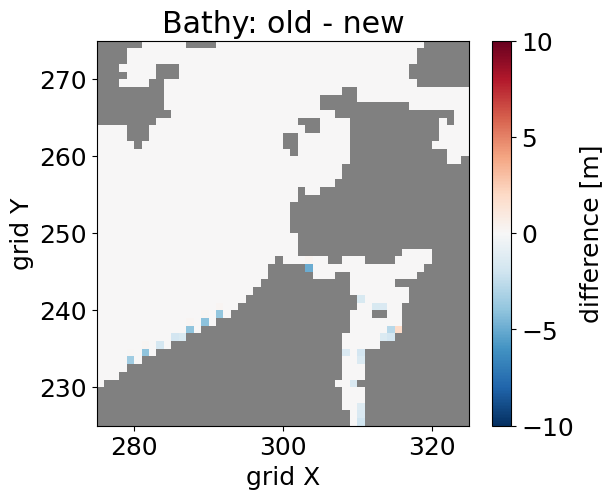

In [21]:
# cmap = mpl.colormaps['RdBu_r']
# cmap.set_bad('gray')

fig, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True, sharey=True)
diff = bathy2.Bathymetry-bathy.Bathymetry
diff_filt = xr.where((diff < -10) & (~np.isnan(diff)), -10, diff)
max_abs = np.abs(diff_filt).max()
masked = np.ma.masked_array(diff_filt, mask=tmask[0])
colours = ax.pcolormesh(masked, vmin=-cut_point, vmax=cut_point, cmap=cmap)
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')
cb = fig.colorbar(colours, ax=ax)
cb.set_label('difference [m]')
ax.set_title('Bathy: old - new')
ax.set_xlim([275,325])
ax.set_ylim([225,275])

(790.0, 840.0)

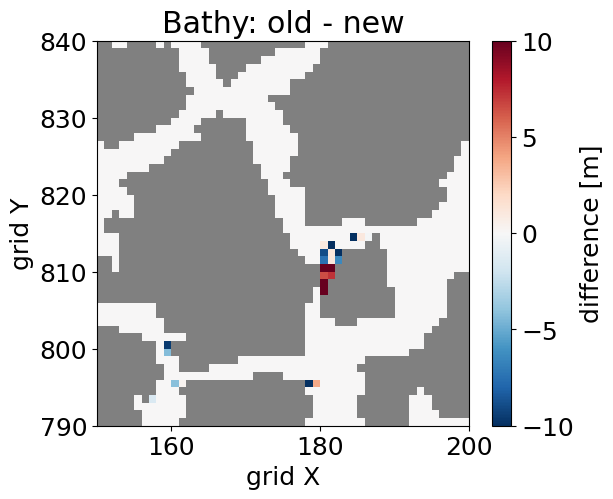

In [22]:
# cmap = mpl.colormaps['RdBu_r']
# cmap.set_bad('gray')

fig, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True, sharey=True)
diff = bathy2.Bathymetry-bathy.Bathymetry
diff_filt = xr.where((diff < -10) & (~np.isnan(diff)), -10, diff)
max_abs = np.abs(diff_filt).max()
masked = np.ma.masked_array(diff_filt, mask=tmask[0])
colours = ax.pcolormesh(masked, vmin=-cut_point, vmax=cut_point, cmap=cmap)
ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')
cb = fig.colorbar(colours, ax=ax)
cb.set_label('difference [m]')
ax.set_title('Bathy: old - new')
ax.set_xlim([150,200])
ax.set_ylim([790,840])

In [40]:
vol_mon_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))

In [38]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
tmask = tmask.rename({'z' : 'depth', 'y': 'gridY', 'x': 'gridX'})

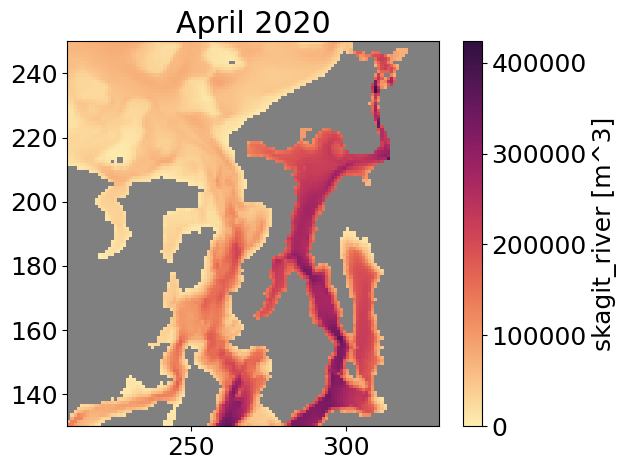

In [52]:
time_idx = 3
ds = vol_mon_2020
p_var = 'skagit_river'
cmap = cm.matter
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (6, 5), sharex=True, sharey=True)

salinity = np.ma.masked_array(ds[p_var][time_idx].sum(axis=0), mask=tmask[0])
colours = ax.pcolormesh(salinity, vmin=0, cmap=cmap)
dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('{} {}'.format(dtime.month_name(), dtime.year))
ax.set_xlim([210,330])
ax.set_ylim([130,250])
# viz_tools.set_aspect(ax);

cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, ds[p_var].units))

In [ ]:
time_idx = 4
ds = vol_mon_2020
p_var = 'squamish_river'
cmap = cm.matter
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (6, 5), sharex=True, sharey=True)

salinity = np.ma.masked_array(ds[p_var][time_idx][0], mask=tmask[0])
colours = ax.pcolormesh(salinity, vmin=0, cmap=cmap)
dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('{} {}'.format(dtime.month_name(), dtime.year))
ax.set_xlim([270,390])
ax.set_ylim([440,560])
# viz_tools.set_aspect(ax);

cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, ds[p_var].units))

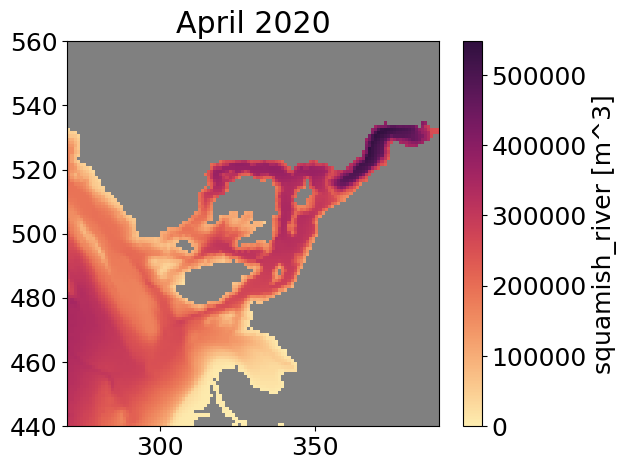

In [63]:
time_idx = 3
ds = vol_mon_2020
p_var = 'squamish_river'
cmap = cm.matter
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (6, 5), sharex=True, sharey=True)

salinity = np.ma.masked_array(ds[p_var][time_idx].sum(axis=0), mask=tmask[0])
colours = ax.pcolormesh(salinity, vmin=0, cmap=cmap)
dtime = pd.to_datetime(ds['time'].values[time_idx])
ax.set_title('{} {}'.format(dtime.month_name(), dtime.year))
ax.set_xlim([270,390])
ax.set_ylim([440,560])
# viz_tools.set_aspect(ax);

cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, ds[p_var].units))